<h3>Metadata</h3>
<p><b>Course:</b> Signals and Systems</p>
<p><b>Assignment:</b> CHW2</p>
<p><b>Student Name:</b> Yones Sohrabi </p>
<p><b>Student Number:</b> 9904833 </p>
<p><b>Reference:</b> Signals and Systems Labratory - Solution Problems - Section 4.12</p>
<p><b>Question Number:</b> 4.12.9</p>


<h3>Question Image</h3>
<p align="center">
  <img src="4.12.9.png" width="1200">
</p>


<h3>Problem Assumptions</h3>
<p>The system is a discrete-time linear time-invariant system described by a second-order difference equation.</p>
<p>All simulations assume zero initial conditions and are evaluated over the interval 0 ≤ n ≤ 20.</p>


<h3>Environment Setup</h3>
<p>NumPy is used for discrete-time sequence construction and SciPy provides the filtering operation equivalent to MATLAB <code>filter(b,a,x)</code>.</p>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter


<h3>Filtering Operation (lfilter)</h3>
<p>The function <code>lfilter(b,a,x)</code> computes the output of a causal discrete-time LTI system described by a linear constant-coefficient difference equation (LCCDE).</p>
<p>Specifically, it implements the recursion</p>

$$
a_0 y[n] = \sum_{k=0}^{M} b_k x[n-k] - \sum_{k=1}^{N} a_k y[n-k]
$$

<p>using the coefficient arrays <code>b</code> and <code>a</code>, and assumes zero initial conditions unless specified otherwise.</p>
<p>This operation is mathematically equivalent to solving the system difference equation sample-by-sample.</p>


In [ ]:
# For this system:
# a = [1, 1, 0.5]
# b = [0.2, 0.1, 0.1]
# lfilter computes y[n] using:
# y[n] = -y[n-1] - 0.5 y[n-2] + 0.2 x[n] + 0.1 x[n-1] + 0.1 x[n-2]


<h2>System Difference Equation</h2>
<p>The system dynamics are governed by a second-order linear difference equation defining a causal LTI IIR system.</p>
<p>For simulation, the equation is expressed using numerator and denominator coefficient arrays.</p>

$$
y[n] = -y[n-1] - 0.5\,y[n-2]
     + 0.2\,x[n] + 0.1\,x[n-1] + 0.1\,x[n-2]
$$

In [4]:
# Given:
# y[n] = -y[n-1] - 0.5 y[n-2] + 0.2 x[n] + 0.1 x[n-1] + 0.1 x[n-2]
#
# Rearranged to standard form:
# y[n] + y[n-1] + 0.5 y[n-2] = 0.2 x[n] + 0.1 x[n-1] + 0.1 x[n-2]

a = np.array([1.0, 1.0, 0.5])   # Denominator coefficients
b = np.array([0.2, 0.1, 0.1])   # Numerator coefficients

n = np.arange(0, 21)           # 0 ≤ n ≤ 20


<h3>Impulse Response</h3>
<p>The impulse response is obtained by applying the unit sample input δ[n] and computing the output via causal recursion.</p>
<p>This response fully characterizes the LTI system in the time domain.</p>

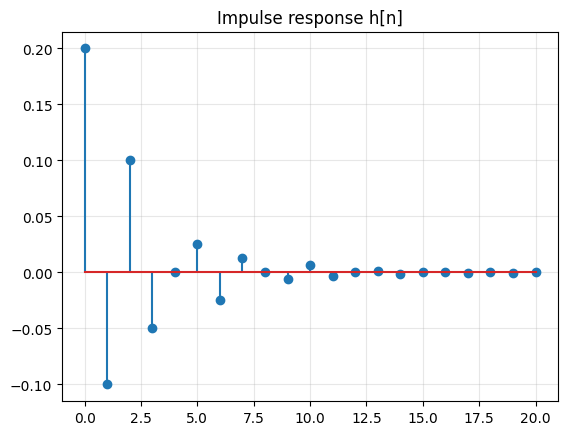

In [5]:
delta = np.zeros_like(n, dtype=float)
delta[0] = 1.0  # δ[n]

h = lfilter(b, a, delta)

plt.figure()
plt.stem(n, h)
plt.title("Impulse response h[n]")
plt.xlim(-1, 21)
plt.grid(True, alpha=0.3)
plt.show()


<h3>Step Response</h3>
<p>The step response is computed by filtering the unit step input u[n], revealing both transient and steady-state behavior.</p>
<p>A bounded step response is consistent with stability for this causal IIR system.</p>


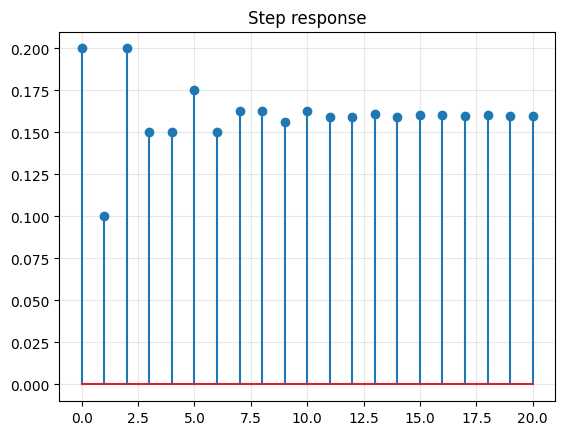

In [6]:
u = np.ones_like(n, dtype=float)  # u[n]
s = lfilter(b, a, u)

plt.figure()
plt.stem(n, s)
plt.title("Step response")
plt.xlim(-1, 21)
plt.grid(True, alpha=0.3)
plt.show()


<h3>Response to Finite-Length Exponential Input</h3>
<p>The input is nonzero only on 0 ≤ n ≤ 5 and is zero elsewhere, so the output contains both forced response and a decaying natural response afterward.</p>
<p>This illustrates how a stable IIR system continues responding after the input terminates due to feedback terms.</p>


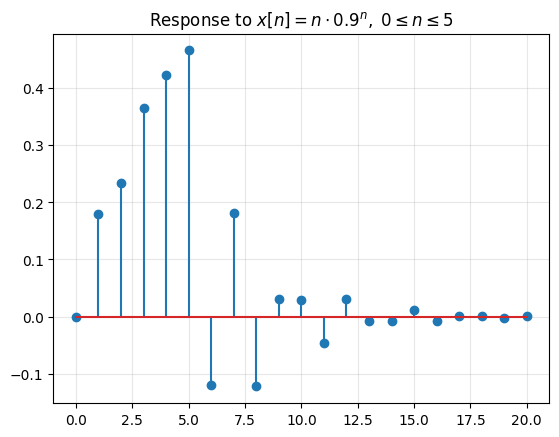

In [7]:
x = np.zeros_like(n, dtype=float)
n1 = np.arange(0, 6)               # 0..5
x[n1] = n1 * (0.9 ** n1)           # x[n] = n * 0.9^n for 0≤n≤5

y = lfilter(b, a, x)

plt.figure()
plt.stem(n, y)
plt.title(r"Response to $x[n]=n\cdot 0.9^n,\; 0\leq n\leq 5$")
plt.xlim(-1, 21)
plt.grid(True, alpha=0.3)
plt.show()


<h3>Difference Equation Solution vs. Convolution</h3>
<p>The recursive solution obtained using <code>lfilter</code> directly solves the system difference equation.</p>
<p>For LTI systems, the output can also be computed as the convolution of the input with the impulse response, y[n] = x[n] * h[n].</p>
<p>Since this system is IIR, the impulse response is theoretically infinite; therefore, the convolution result is an approximation obtained by truncating h[n] to 0 ≤ n ≤ 20.</p>
<p>The small difference between the two results confirms consistency between the two methods.</p>


In [ ]:
# Convolution-based output using truncated impulse response
y_conv = np.convolve(x, h)[:len(n)]

# Difference between recursive and convolution solutions
max_error = np.max(np.abs(y - y_conv))
max_error


<h3>Result Analysis</h3>
<p>The impulse response decays rapidly, indicating a stable causal system with short effective memory.</p>
<p>The step response converges to a finite value, consistent with a finite DC gain.</p>

<h3>Mathematical Solution</h3>
<p><b>Difference equation:</b></p>

$$
y[n] + y[n-1] + 0.5\,y[n-2]
=
0.2\,x[n] + 0.1\,x[n-1] + 0.1\,x[n-2]
$$

<p><b>Transfer function:</b></p>

$$
H(z) = \frac{0.2 + 0.1z^{-1} + 0.1z^{-2}}
            {1 + z^{-1} + 0.5z^{-2}}
$$

<h3>Key Characteristics</h3>
<ul>
  <li>Second-order causal LTI IIR system</li>
  <li>Impulse response is decaying (stable behavior)</li>
  <li>Step response approaches a finite steady-state value</li>
</ul>

<h3>Physical Interpretation</h3>
<p>The system behaves like a damped discrete-time feedback system: short excitations create a transient that fades, while constant inputs lead to a steady level.</p>
